<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 140.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 194.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 155.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 160.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 172.5 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
# Verificare i valori mancanti nelle colonne critiche
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values before handling:\n", missing_values)

# Per imputare i valori mancanti con il valore più frequente (mode)
for col in ['Employment', 'JobSat', 'RemoteWork']:
    most_frequent = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent)

# Verificare di nuovo i valori mancanti dopo l'imputazione
missing_values_after = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Missing values before handling:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after handling:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Median Job Satisfaction by Experience Range:
 ExperienceRange
0-5     NaN
5-10    NaN
10-20   NaN
20+     NaN
Name: JobSatScore, dtype: float64


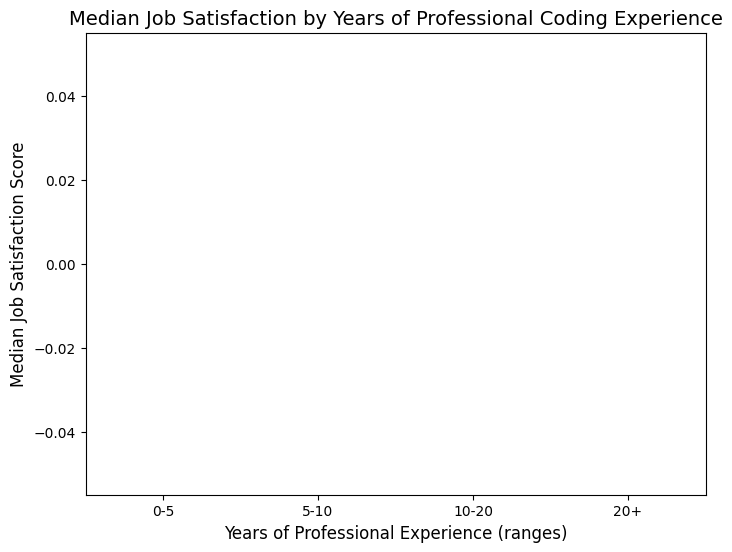

Valori unici in YearsCodePro: [nan 17. 27.  7. 11. 25. 12. 10.  3. 18. 37. 15. 20.  6.  2. 16.  8. 14.
  4. 45.]
Conteggio ExperienceRange:
 ExperienceRange
NaN      16733
0-5      14115
10-20    13327
5-10     12928
20+       8334
Name: count, dtype: int64
Valori unici in JobSat: [ 8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]
Conteggio JobSatScore:
 JobSatScore
NaN    65437
Name: count, dtype: int64


In [7]:
## Write your code here
# Convertiamo YearsCodePro in numerico (gestendo valori strani come 'Less than 1 year', 'More than 50 years')
df['YearsCodePro'] = df['YearsCodePro'].replace(
    {'Less than 1 year': 0, 'More than 50 years': 51}
)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Creiamo i range di esperienza
bins = [0, 5, 10, 20, 100]   # fino a 100 per includere valori estremi
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Mapping di JobSat a punteggi numerici
job_sat_mapping = {
    'Very satisfied': 5,
    'Satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Dissatisfied': 2,
    'Very dissatisfied': 1
}
df['JobSatScore'] = df['JobSat'].map(job_sat_mapping)

# Calcoliamo la mediana per ciascun range
median_satisfaction = df.groupby('ExperienceRange', observed=True)['JobSatScore'].median()
print("Median Job Satisfaction by Experience Range:\n", median_satisfaction)

# Barplot (sistemando il warning su palette/hue)
plt.figure(figsize=(8,6))
sns.barplot(
    x=median_satisfaction.index, 
    y=median_satisfaction.values, 
    hue=median_satisfaction.index, 
    palette="Blues_d", 
    legend=False
)

plt.title("Median Job Satisfaction by Years of Professional Coding Experience", fontsize=14)
plt.xlabel("Years of Professional Experience (ranges)", fontsize=12)
plt.ylabel("Median Job Satisfaction Score", fontsize=12)
plt.show()

# Controlliamo i valori unici di YearsCodePro dopo la conversione
print("Valori unici in YearsCodePro:", df['YearsCodePro'].unique()[:20])

# Controlliamo quante righe hanno ExperienceRange non nullo
print("Conteggio ExperienceRange:\n", df['ExperienceRange'].value_counts(dropna=False))

# Controlliamo i valori unici in JobSat
print("Valori unici in JobSat:", df['JobSat'].unique())

# Controlliamo quante righe hanno JobSatScore non nullo
print("Conteggio JobSatScore:\n", df['JobSatScore'].value_counts(dropna=False))


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


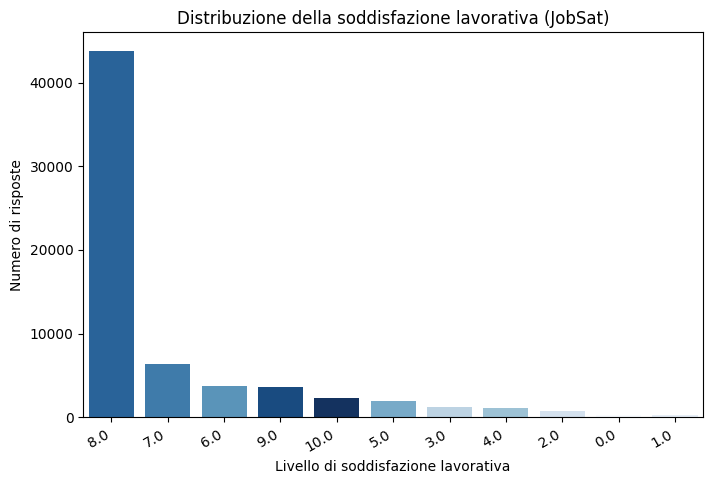

In [9]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x="JobSat",
    hue="JobSat",  # assegniamo anche hue
    order=df['JobSat'].value_counts().index,
    palette="Blues",
    legend=False   # così non appare la legenda doppia
)

plt.title("Distribuzione della soddisfazione lavorativa (JobSat)")
plt.xlabel("Livello di soddisfazione lavorativa")
plt.ylabel("Numero di risposte")
plt.xticks(rotation=30, ha="right")
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_300/3679334313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


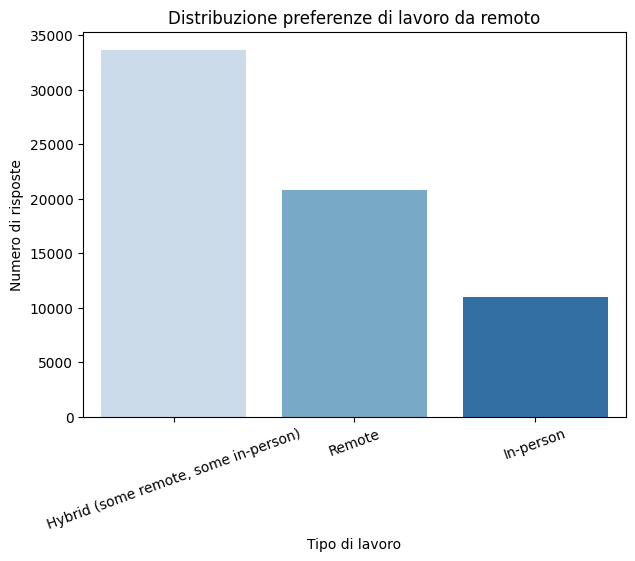

Distribuzione RemoteWork per tipo di Employment:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time             

In [11]:
## Write your code here
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="RemoteWork",
    order=df['RemoteWork'].value_counts().index,
    palette="Blues"
)
plt.title("Distribuzione preferenze di lavoro da remoto")
plt.xlabel("Tipo di lavoro")
plt.ylabel("Numero di risposte")
plt.xticks(rotation=20)
plt.show()

crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])

print("Distribuzione RemoteWork per tipo di Employment:")
print(crosstab)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


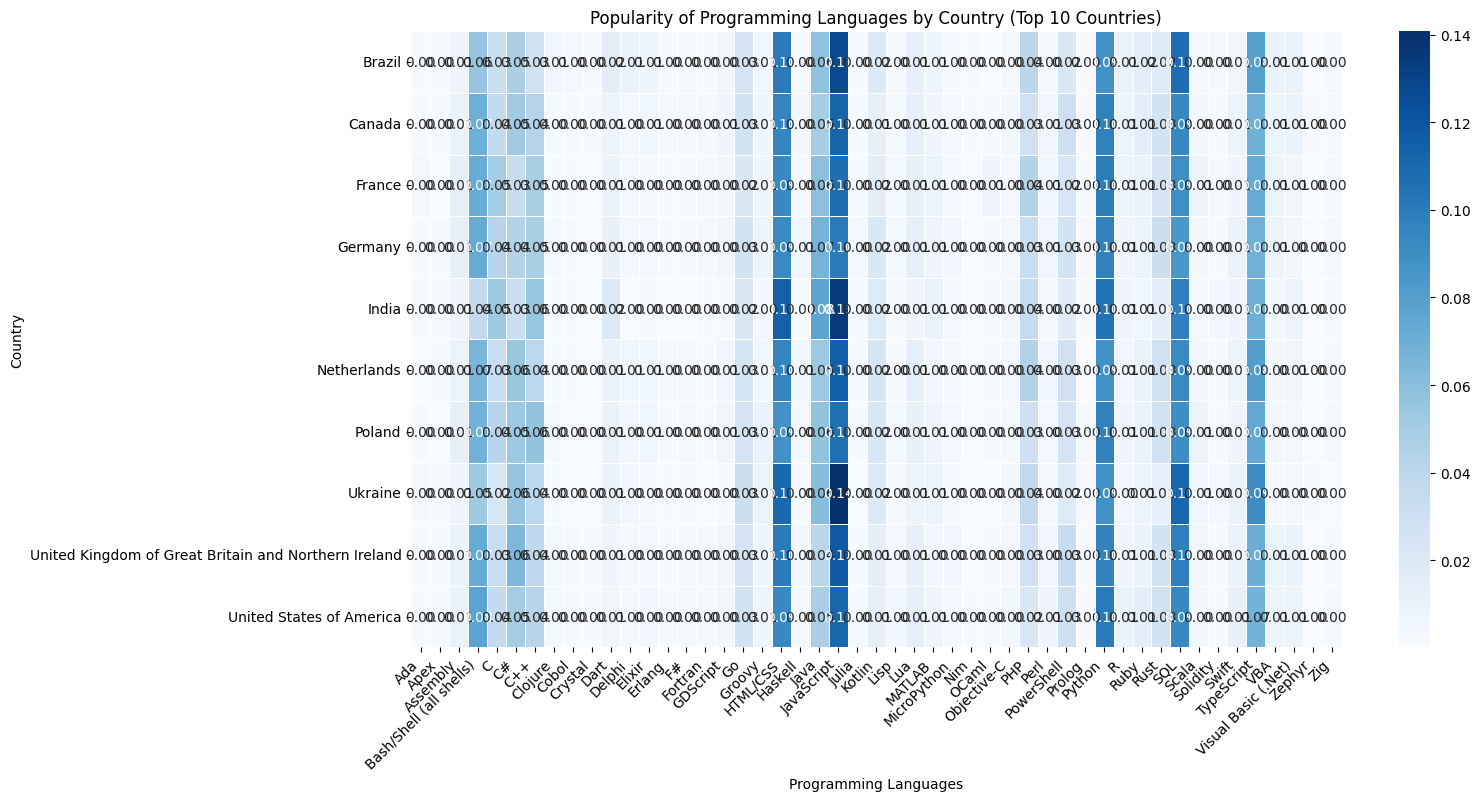

In [14]:
## Write your code here
top_countries = df['Country'].value_counts().nlargest(10).index
df_top = df[df['Country'].isin(top_countries) & df['LanguageHaveWorkedWith'].notna()]

languages = df_top['LanguageHaveWorkedWith'].str.get_dummies(sep=';')

languages['Country'] = df_top['Country'].values

pivot_lang = languages.groupby('Country').sum()

pivot_lang_norm = pivot_lang.div(pivot_lang.sum(axis=1), axis=0)

plt.figure(figsize=(15,8))
sns.heatmap(
    pivot_lang_norm,
    cmap='Blues',
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)
plt.title("Popularity of Programming Languages by Country (Top 10 Countries)")
plt.xlabel("Programming Languages")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


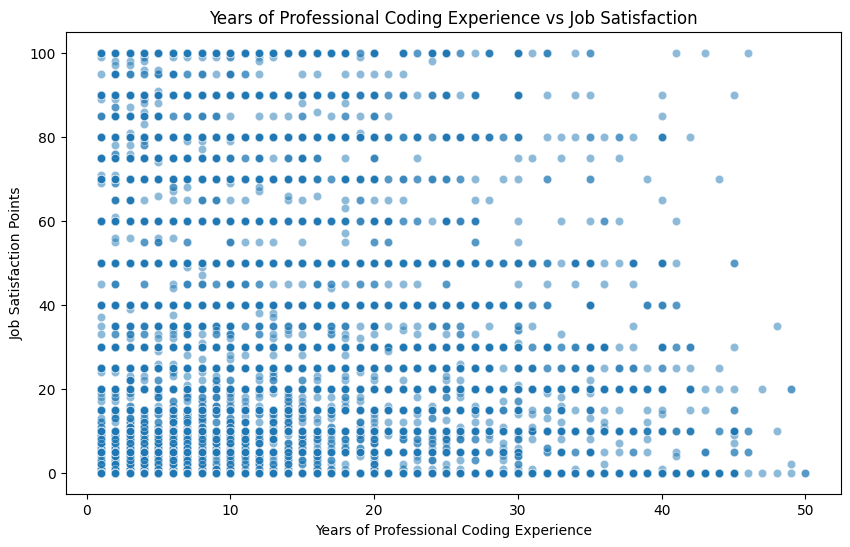

In [15]:
## Write your code here
df['YearsCodePro_Num'] = df['YearsCodePro']

df['YearsCodePro_Num'] = df['YearsCodePro_Num'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

df['YearsCodePro_Num'] = pd.to_numeric(df['YearsCodePro_Num'], errors='coerce')

df_scatter = df.dropna(subset=['YearsCodePro_Num', 'JobSatPoints_1'])

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_scatter,
    x='YearsCodePro_Num',
    y='JobSatPoints_1',
    alpha=0.5
)
plt.title("Years of Professional Coding Experience vs Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Points")
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_300/929102554.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EdLevelSimplified'] = df_filtered['EdLevel'].map(education_mapping).fillna('Other')
/tmp/ipykernel_300/929102554.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


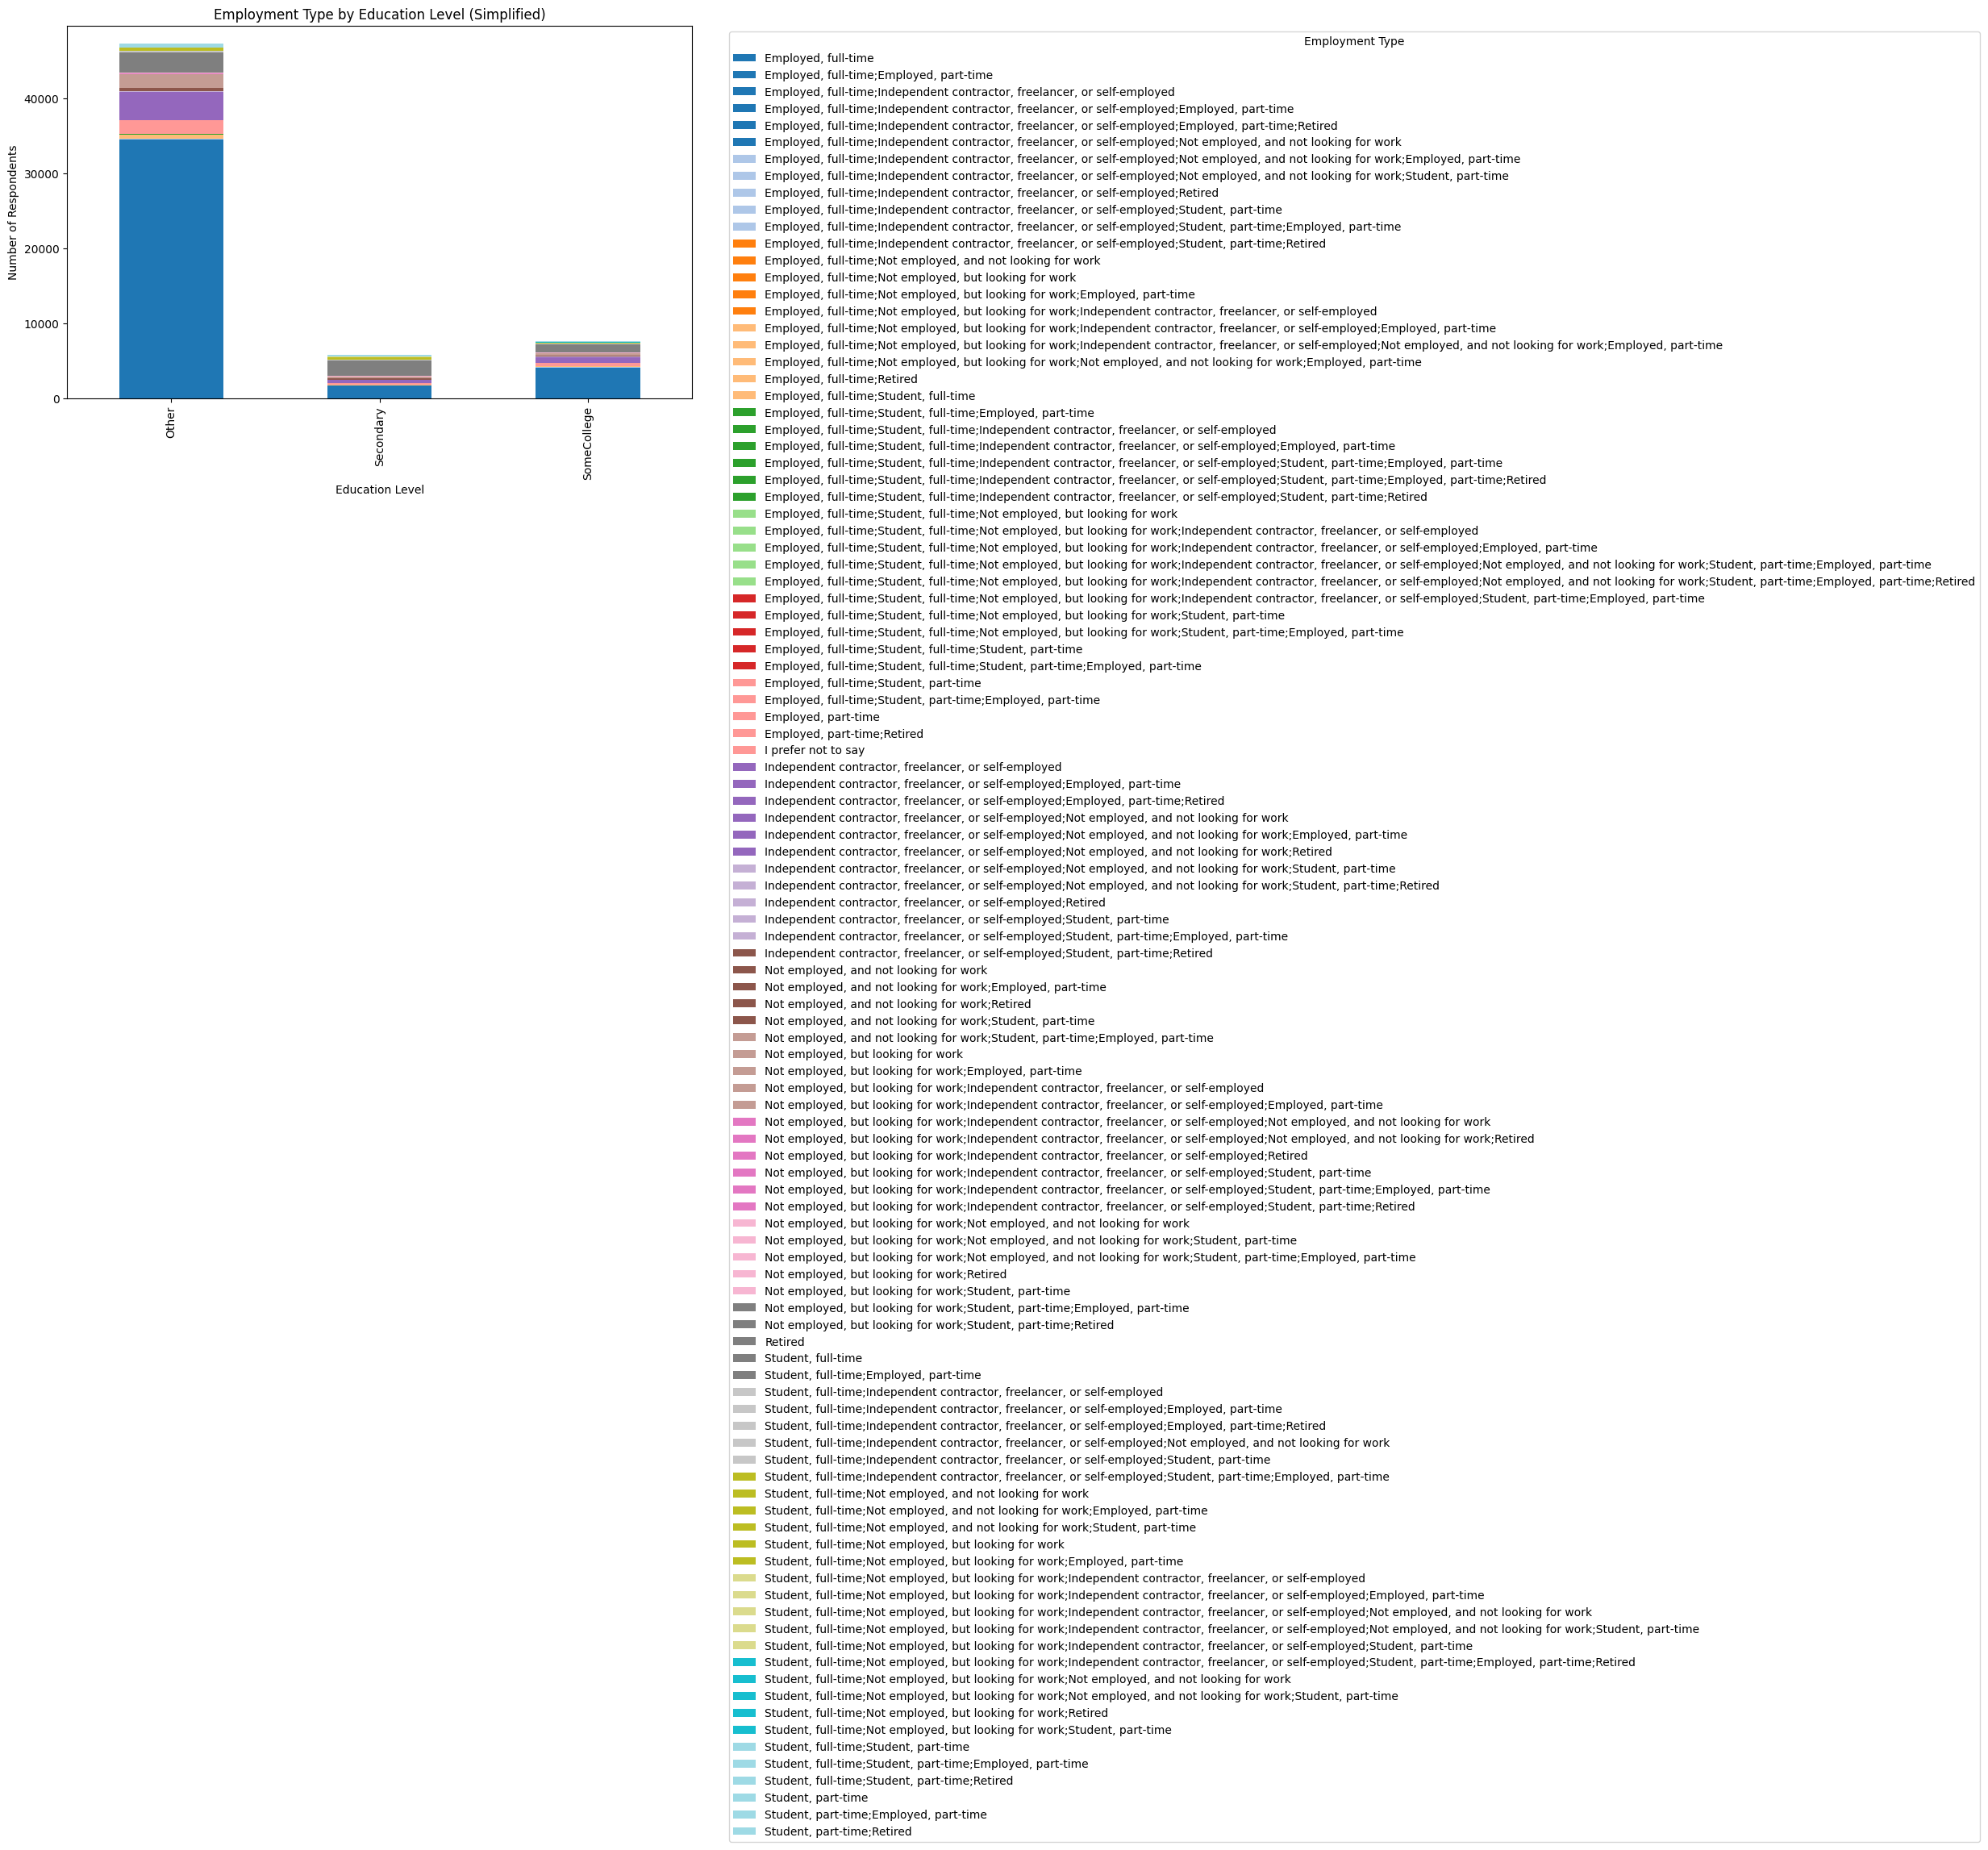

In [21]:
## Write your code here
df_filtered = df.dropna(subset=['EdLevel', 'Employment'])

education_mapping = {
    "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "Master",
    "Some college/university study without earning a degree": "SomeCollege",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary",
    "Other doctoral degree (Ph.D, Ed.D., etc.)": "Doctorate",
    "Professional degree (JD, MD, etc.)": "Professional",
    "I never completed any formal education": "None"
}

df_filtered['EdLevelSimplified'] = df_filtered['EdLevel'].map(education_mapping).fillna('Other')

pivot = pd.crosstab(df_filtered['EdLevelSimplified'], df_filtered['Employment'])

pivot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Employment Type by Education Level (Simplified)')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_csv("survey_data_cleaned.csv", index=False)

print("Dataset successfully saved as 'survey_data_cleaned.csv'.")


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
